# Aim: Predicting Average Food Delivery Time of Restraunts to the given location

In [39]:
import pandas as pd
import numpy as np
import warnings
import itertools
import re
from sklearn import metrics
from category_encoders import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_excel("Data_Train.xlsx")
test = pd.read_excel("Data_Test.xlsx")

In [3]:
def dataset_info(df):
    print("Shape of the dataset: " + str(df.shape))
    print("Displaying the dataset")
    display(df.head())
    print("Unique Values in the Dataset are: ")
    print(df.nunique())
    print("Datatypes and Null Values of each column")
    print(df.info(null_counts=True, verbose=True))

In [4]:
dataset_info(train)

Shape of the dataset: (11094, 9)
Displaying the dataset


,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes


Unique Values in the Dataset are: 
Restaurant       7480
Location           35
Cuisines         2179
Average_Cost       26
Minimum_Order      18
Rating             33
Votes            1103
Reviews           761
Delivery_Time       7
dtype: int64
Datatypes and Null Values of each column
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11094 entries, 0 to 11093
Data columns (total 9 columns):
Restaurant       11094 non-null object
Location         11094 non-null object
Cuisines         11094 non-null object
Average_Cost     11094 non-null object
Minimum_Order    11094 non-null object
Rating           11094 non-null object
Votes            11094 non-null object
Reviews          11094 non-null object
Delivery_Time    11094 non-null object
dtypes: object(9)
memory usage: 780.1+ KB
None


In [5]:
dataset_info(test)

Shape of the dataset: (2774, 8)
Displaying the dataset


,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews
0,ID_2842,"Mico Layout, Stage 2, BTM Layout,Bangalore","North Indian, Chinese, Assamese",₹350,₹50,4.2,361,225
1,ID_730,"Mico Layout, Stage 2, BTM Layout,Bangalore","Biryani, Kebab",₹100,₹50,NEW,-,-
2,ID_4620,"Sector 1, Noida",Fast Food,₹100,₹50,3.6,36,16
3,ID_5470,"Babarpur, New Delhi, Delhi","Mithai, North Indian, Chinese, Fast Food, Sout...",₹200,₹50,3.6,66,33
4,ID_3249,"Sector 1, Noida","Chinese, Fast Food",₹150,₹50,2.9,38,14


Unique Values in the Dataset are: 
Restaurant       2401
Location           35
Cuisines          881
Average_Cost       19
Minimum_Order       9
Rating             30
Votes             580
Reviews           392
dtype: int64
Datatypes and Null Values of each column
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2774 entries, 0 to 2773
Data columns (total 8 columns):
Restaurant       2774 non-null object
Location         2774 non-null object
Cuisines         2774 non-null object
Average_Cost     2774 non-null object
Minimum_Order    2774 non-null object
Rating           2774 non-null object
Votes            2774 non-null object
Reviews          2774 non-null object
dtypes: object(8)
memory usage: 173.5+ KB
None


In [6]:
set(test['Location'].unique()) - set(train['Location'].unique())

set()

No New Address in the test data.

In [7]:
def rupee_to_integer(df, column):
    df[column] = df[column].apply(lambda x: re.sub("[^0-9]", "", str(x)))
    df[column][df[column]==""] = -1
    df[column] = df[column].astype(int)
    df[column][df[column]==-1] = train[column].median()
    return df

def preprocessing(df):
    df = rupee_to_integer(df, 'Average_Cost')
    df = rupee_to_integer(df, 'Minimum_Order')
    df['Rating'][df['Rating'].isin(["Opening Soon","NEW", "-", "Temporarily Closed"])] = -99
    df['Rating']=df['Rating'].astype("float64")
    df['Votes'][df['Votes']== "-"] = -99
    df['Votes']=df['Votes'].astype("int64")
    df['Reviews'][df['Reviews']== "-"] = -99
    df['Reviews']=df['Reviews'].astype("int64")
    return df

In [8]:
train = preprocessing(train)
test = preprocessing(test)

In [9]:
for i in test['Location'].unique():
    print(i)

Mico Layout, Stage 2, BTM Layout,Bangalore
Sector 1, Noida
Babarpur, New Delhi, Delhi
Yerawada, Pune, Maharashtra
Raja Bazar, Kolkata
Sector 3, Marathalli
D-Block, Sector 63, Noida
Delhi University-GTB Nagar
Delhi High Court, India Gate
BTM Layout 1, Electronic City
Sector 14, Noida
Laxman Vihar Industrial Area, Sector 3A, Gurgoan
FTI College, Law College Road, Pune
Sandhurst Road, Mumbai CST Area
Nathan Road, Mangaldas Road, Pune
Majestic
Dockyard Road, Mumbai CST Area
Delhi Cantt.
Mumbai Central
Tiretti, Kolkata
Sector 63A,Gurgaon
Rmz Centennial, I Gate, Whitefield
MG Road, Pune
Tejas Nagar Colony, Wadala West, Mumbai
Moulali, Kolkata
Delhi Administration Flats, Timarpur
Chandni Chowk, Kolkata
Musi Nagar, Malakpet, Hyderabad
Pune University
Panjetan Colony, Malakpet, Hyderabad
Chatta Bazaar, Malakpet, Hyderabad
Jaya Nagar, Saidabad, Hyderabad
Gora Bazar, Rajbari, North Dumdum, Kolkata
Hyderabad Public School, Begumpet
Noorkhan Bazaar, Malakpet, Hyderabad


Extract city from address. Other than Bangalore every other address have city name present in it

In [10]:
def find_city_in_address(address):
    cities_to_check = ['pune', 'mumbai', 'noida', 'delhi', 'kolkata', 'bangalore', 'gurgoan', 'hyderabad']
    present_city="bangalore"
    for city in cities_to_check:
        if city in address.lower():
            present_city = city
    return present_city

In [11]:
train['city'] = train['Location'].apply(find_city_in_address)
test['city'] = test['Location'].apply(find_city_in_address)

*It seems that restraunt which have multiple branches have marked under the sameId's

In [13]:
print("Number of New Restraunts in test data: " + str(len(set(test['Restaurant'].unique()) - set(train['Restaurant'].unique()))))

Number of New Restraunts in test data: 1181


In [14]:
test['Delivery_Time'] = -1

In [15]:
total_df = pd.concat([train,test])
total_df = total_df.reset_index(drop=True)

In [16]:
#Number of restraunts available at each location.
total_df['restaraunt_counts'] = total_df['Location'].map(total_df.groupby(['Location'])['Restaurant'].count())
#Number of location served by each parent restraunt
total_df['location_count'] = total_df['Restaurant'].map(total_df.groupby(['Restaurant'])['Location'].count())

In [17]:
#Individual restraunt Id's
total_df['new_id'] = total_df.groupby(['Restaurant', 'Cuisines', 'Rating', 'Votes', 'Reviews'], sort=False).ngroup() + 1

In [18]:
#Number of restraunts available at each location.
total_df['unique_restaraunt_counts'] = total_df['Location'].map(total_df.groupby(['Location'])['Restaurant'].count())
#Number of location served by each parent restraunt
total_df['unique_location_count'] = total_df['Restaurant'].map(total_df.groupby(['Restaurant'])['Location'].count())

In [19]:
len(total_df['Restaurant'][total_df['Rating'].isin([-99])].unique())

1758

*1758 restaurants have No ratings here. # We can handle some them by copying data from parent restraunt.*

In [20]:
total_df['Rating'][total_df['Rating']==-99] = total_df['Restaurant'][total_df['Rating']==-99].map(total_df[['Restaurant', 'Rating']][total_df['Rating']!=-99].groupby(['Restaurant'])['Rating'].mean()).fillna(-99)
total_df['Votes'][total_df['Votes']==-99] = total_df['Restaurant'][total_df['Votes']==-99].map(total_df[['Restaurant', 'Votes']][total_df['Votes']!=-99].groupby(['Restaurant'])['Votes'].median()).fillna(-99)
total_df['Reviews'][total_df['Reviews']==-99] = total_df['Restaurant'][total_df['Reviews']==-99].map(total_df[['Restaurant', 'Reviews']][total_df['Reviews']!=-99].groupby(['Restaurant'])['Reviews'].median()).fillna(-99)

In [21]:
overll_food_available = (total_df['Cuisines'].apply(lambda x: (x.split(", "))).to_list())
print("Total Number of Cusine variety available: " + str(len(set(list(itertools.chain.from_iterable(overll_food_available))))))                          

Total Number of Cusine variety available: 101


In [22]:
cusine_list = list(set(list(itertools.chain.from_iterable(overll_food_available))))

In [23]:
cusine_column_dict={}
for index, value in enumerate(cusine_list):
    cusine_column_dict[value] = index

In [24]:
def one_hot_cusine(x):
    x = x.split(", ")
    return_cusine_list = ([0]*101)
    for cusine in x:
        return_cusine_list[cusine_column_dict[cusine]]=1
    return return_cusine_list
total_df['cusine_before_one_hot'] = total_df['Cuisines'].apply(one_hot_cusine)

In [25]:
total_df[cusine_list] = pd.DataFrame(total_df.cusine_before_one_hot.values.tolist(), index= total_df.index)

In [26]:
del total_df['cusine_before_one_hot']

In [27]:
total_df['Number_of_cusines_available'] = total_df['Cuisines'].apply(lambda x: len(x.split(", ")))

In [28]:
total_df['rid'] = total_df['Restaurant'].str[3:].astype(int)

In [29]:
ordinal_columns = ['Cuisines', 'Location', 'Restaurant', 'city']

In [30]:
ordinal_encoder = OrdinalEncoder()
total_df[ordinal_columns] = ordinal_encoder.fit_transform(total_df[ordinal_columns])

In [31]:
total_df.info(null_counts=True, verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13868 entries, 0 to 13867
Data columns (total 118 columns):
Average_Cost                   13868 non-null int32
Cuisines                       13868 non-null int32
Delivery_Time                  13868 non-null object
Location                       13868 non-null int32
Minimum_Order                  13868 non-null int32
Rating                         13868 non-null float64
Restaurant                     13868 non-null int32
Reviews                        13868 non-null float64
Votes                          13868 non-null float64
city                           13868 non-null int32
restaraunt_counts              13868 non-null int64
location_count                 13868 non-null int64
new_id                         13868 non-null int64
unique_restaraunt_counts       13868 non-null int64
unique_location_count          13868 non-null int64
Indonesian                     13868 non-null int64
Mediterranean                  13868 non-null int64

In [32]:
total_df_columns = total_df.columns.to_list()
for index,column in enumerate(total_df_columns):
    total_df_columns[index] = re.sub(r'[^\x00-\x7F]+',' ', column)
total_df.columns = total_df_columns

In [33]:
train = total_df[total_df['Delivery_Time']!=-1]
test = total_df[total_df['Delivery_Time']==-1]
del test['Delivery_Time']

In [34]:
label_encoder = LabelEncoder()
train['Delivery_Time'] = label_encoder.fit_transform(train['Delivery_Time'])

In [35]:
X = train.drop(['Delivery_Time'], axis=1)
y = train['Delivery_Time']

In [36]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold,train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score

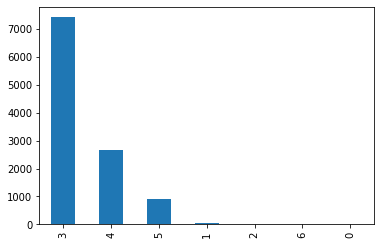

In [40]:
#Observing the Distribution of Classes
y.value_counts().plot.bar()

In [37]:
#Using Imblearn random oversampling for balancing out the classes.
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)

# 10 Fold Cross Validation for LightGBM

In [69]:
accu=[]
pred_list=[]
from sklearn.model_selection import KFold,StratifiedKFold
fold=StratifiedKFold(n_splits=10,shuffle=True,random_state=1994)
i=1
for train_index, test_index in fold.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    X_train, y_train = ros.fit_resample(X_train, y_train)
    m=LGBMClassifier(n_estimators=3000,random_state=1994,learning_rate=0.03,colsample_bytree=0.2,objective='multiclass', is_unbalance = 'true')
    m.fit(X_train,y_train,eval_set=[(X_test, y_test)],eval_metric='multi_logloss', early_stopping_rounds=200,verbose=200)
    preds=m.predict(X_test)
    print(preds)
    print("Accuracy: ",metrics.accuracy_score(y_test,preds))
    print("Confusion Matrix: ")
    print(metrics.confusion_matrix(y_test,preds))
    accu.append(metrics.accuracy_score(y_test,preds))
    pred_list.append(m.predict(test))


Training until validation scores don't improve for 200 rounds
[200]	valid_0's multi_logloss: 0.841607
[400]	valid_0's multi_logloss: 0.735276
[600]	valid_0's multi_logloss: 0.699874
[800]	valid_0's multi_logloss: 0.680335
[1000]	valid_0's multi_logloss: 0.667256
[1200]	valid_0's multi_logloss: 0.655379
[1400]	valid_0's multi_logloss: 0.645235
[1600]	valid_0's multi_logloss: 0.635967
[1800]	valid_0's multi_logloss: 0.628316
[2000]	valid_0's multi_logloss: 0.622593
[2200]	valid_0's multi_logloss: 0.616424
[2400]	valid_0's multi_logloss: 0.613924
[2600]	valid_0's multi_logloss: 0.611349
[2800]	valid_0's multi_logloss: 0.609765
[3000]	valid_0's multi_logloss: 0.609141
Did not meet early stopping. Best iteration is:
[2920]	valid_0's multi_logloss: 0.609034
[3 3 3 ... 3 3 3]
Accuracy:  0.7987421383647799
Confusion Matrix: 
[[  0   0   0   1   0   0   0]
 [  0   4   0   2   0   1   0]
 [  0   0   0   1   1   0   0]
 [  0   0   0 663  69   9   0]
 [  0   0   0  67 182  18   0]
 [  0   0   0  1

[1400]	valid_0's multi_logloss: 0.605727
[1600]	valid_0's multi_logloss: 0.596244
[1800]	valid_0's multi_logloss: 0.586802
[2000]	valid_0's multi_logloss: 0.580127
[2200]	valid_0's multi_logloss: 0.574659
[2400]	valid_0's multi_logloss: 0.569897
[2600]	valid_0's multi_logloss: 0.566935
[2800]	valid_0's multi_logloss: 0.565023
[3000]	valid_0's multi_logloss: 0.563838
Did not meet early stopping. Best iteration is:
[2984]	valid_0's multi_logloss: 0.563399
[5 4 3 ... 3 3 3]
Accuracy:  0.7996389891696751
Confusion Matrix: 
[[  1   0   0   0   0   0   0]
 [  0   3   0   2   1   0   0]
 [  0   0   0   2   0   0   0]
 [  0   1   0 655  70  14   0]
 [  0   0   0  66 186  14   0]
 [  0   0   0  22  30  40   0]
 [  0   0   0   0   0   0   1]]
Training until validation scores don't improve for 200 rounds
[200]	valid_0's multi_logloss: 0.820503
[400]	valid_0's multi_logloss: 0.718624
[600]	valid_0's multi_logloss: 0.683408
[800]	valid_0's multi_logloss: 0.663288
[1000]	valid_0's multi_logloss: 0.6

In [73]:
pred_df = pd.DataFrame(pred_list)
pred_df = pred_df.T

In [78]:
# Submission File
sub = pd.read_excel("Sample_Submission.xlsx")

In [95]:
#Saing the Prediction Results of Each Model.
for i in range(10):
    sub['Delivery_Time'] = label_encoder.inverse_transform(pred_df[i])
    # Create a Pandas Excel writer using XlsxWriter as the engine.
    writer = pd.ExcelWriter("ss" + str(i) + ".xlsx", engine='xlsxwriter')

    # Convert the dataframe to an XlsxWriter Excel object.
    sub.to_excel(writer, sheet_name='Sheet1')
    
    # Close the Pandas Excel writer and output the Excel file.
    writer.save()
    #sub.to_csv("ss" + str(i) + ".csv", index=False)

3    1969
4     679
5     120
1       4
6       1
2       1
Name: 0, dtype: int64
3    2359
4     312
5      96
1       4
2       2
6       1
Name: 1, dtype: int64
3    2039
4     641
5      87
1       4
2       2
6       1
Name: 2, dtype: int64
3    1974
4     657
5     136
1       4
2       2
6       1
Name: 3, dtype: int64
3    1948
4     687
5     132
1       4
2       2
6       1
Name: 4, dtype: int64
3    2131
4     534
5     104
1       3
6       1
2       1
Name: 5, dtype: int64
3    2150
4     456
5     160
1       5
2       2
6       1
Name: 6, dtype: int64
3    1861
4     781
5     125
1       4
2       2
6       1
Name: 7, dtype: int64
3    2174
4     492
5     101
1       4
2       2
6       1
Name: 8, dtype: int64
3    1922
4     686
5     159
1       4
2       2
6       1
Name: 9, dtype: int64


In [108]:
# Hard merging of all the models.
sub['Delivery_Time'] = label_encoder.inverse_transform(pred_df.apply(lambda x: x.mode()[0], axis=1))
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter("ss" + str(10) + ".xlsx", engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
sub.to_excel(writer, sheet_name='Sheet1')

# Close the Pandas Excel writer and output the Excel file.
writer.save()